OKC DATA SOFTWARE ENGINEER PROJECT 
BY DIEGO SALDONID

In [37]:
import pandas as pd
import math

In [38]:
#load data from csv to dataframe in pandas
df = pd.read_csv('shots_data.csv')

In [39]:
#visualize dataframe
df

,team,x,y,fgmade
0,Team A,-23.1,3.5,0
1,Team A,0.0,25.1,1
2,Team A,0.5,1.0,1
3,Team A,-5.6,5.2,0
4,Team A,4.0,14.5,1
...,...,...,...,...
555,Team B,7.8,24.7,0
556,Team B,10.1,1.4,1
557,Team B,-17.8,-0.1,0
558,Team B,22.6,2.9,0


In [40]:
#create squared x and y columns to calculate non-corner threes
df['x_sqd'] = df['x'].pow(2)
df['y_sqd'] = df['y'].pow(2)

In [41]:
#create column with distance from basketball hoop
df['dist'] = (df['x_sqd'] + df['y_sqd'])**(1/2)

In [42]:
#df now has columns with x and y squared and total dist from basket
df

,team,x,y,fgmade,x_sqd,y_sqd,dist
0,Team A,-23.1,3.5,0,533.61,12.25,23.363647
1,Team A,0.0,25.1,1,0.00,630.01,25.100000
2,Team A,0.5,1.0,1,0.25,1.00,1.118034
3,Team A,-5.6,5.2,0,31.36,27.04,7.641989
4,Team A,4.0,14.5,1,16.00,210.25,15.041609
...,...,...,...,...,...,...,...
555,Team B,7.8,24.7,0,60.84,610.09,25.902316
556,Team B,10.1,1.4,1,102.01,1.96,10.196568
557,Team B,-17.8,-0.1,0,316.84,0.01,17.800281
558,Team B,22.6,2.9,0,510.76,8.41,22.785302


In [48]:
def get_team_fg(df,team):
    return df[df['team'] == team]

In [49]:
def calculate_noncorner_threes(df):
    #to find approximation for beginning of arc I used pythagorean theorem to calculate the y coordinate (approx. 8.95ft)
    #non-corner threes are defined by either:
    # 1) x,y coordinates [x<=-22 or x>=22, y>7.8] (i.e. area before arc)
    # 2) 23.75 ft away from the basket (Euclidean distance)
    return df.loc[(((df['x'] >= 22) | (df['x'] <= -22)) & (df['y']>7.8)) | ((df['dist'] >= 23.75) & (df['y']>8.95))]

In [50]:
def calculate_corner_threes(df):
    #corner threes are defined by x,y coordinates [x<=-22 or x>=22, y<=7.8]
    return df[(df['y'] <= 7.8) & ((df['x'] >= 22) |(df['x'] <= -22))]

In [51]:
def calculate_two_pointers(df):
    #two pointers are defined by shots by the coordinates [-22<x<22 , y < 8.95] 
    #and with distance less than 23.75 feet and y>8.95 (shots within arc)
    return df.loc[((df['x'] < 22) & (df['x'] >= 0) | (df['x'] > -22) & (df['x'] <= 0)) & (df['y']<8.95) |((df['y'] > 8.95) & (df['dist'] < 23.75))]


In [52]:
def calculate_eFG(fgm,threes_made,fga):
    egper_float = ((fgm +(.5*threes_made))/fga) *100

    #round to nearest hundreth
    return round(egper_float,2)

In [53]:
def calculate_fgper(fgm,fga):
    fg_float = (fgm/fga) * 100
    #round to nearest hundreth
    return round(fg_float,2)

In [54]:
def calculate_made_plus_total(df):
    #.shape returns a tuple with the rows and columns, respectively
    total_shots = df.shape[0]

    #grab all row where fgmade equals 1
    made_shots = df.loc[df['fgmade'] == 1].shape[0]

    return (total_shots,made_shots)


In [55]:
#seperate teams by name
team_a_fgs = get_team_fg(df,'Team A')
team_b_fgs = get_team_fg(df,'Team B')

In [56]:
#calculate each team's corner three efg%
team_a_corner_3s = calculate_corner_threes(team_a_fgs)
team_a_corner_3s_total, team_a_corner_3s_made = calculate_made_plus_total(team_a_corner_3s)
team_a_corner_3s_efper = calculate_eFG(team_a_corner_3s_made,team_a_corner_3s_made,team_a_corner_3s_total)

team_b_corner_3s = calculate_corner_threes(team_b_fgs)
team_b_corner_3s_total, team_b_corner_3s_made = calculate_made_plus_total(team_b_corner_3s)
team_b_corner_3s_efper = calculate_eFG(team_b_corner_3s_made,team_b_corner_3s_made,team_b_corner_3s_total)

In [57]:
#calculate each team's corner three fg%
team_a_corner_3s_fgper = calculate_fgper(team_a_corner_3s_made,team_a_corner_3s_total)
team_b_corner_3s_fgper = calculate_fgper(team_b_corner_3s_made,team_b_corner_3s_total)

In [59]:
#calculate each team's non-noncorner three efg%
team_a_noncorner_3s = calculate_noncorner_threes(team_a_fgs)
team_a_noncorner_3s_total, team_a_noncorner_3s_made = calculate_made_plus_total(team_a_noncorner_3s)
team_a_noncorner_3s_efper = calculate_eFG(team_a_noncorner_3s_made,team_a_noncorner_3s_made,team_a_noncorner_3s_total)

team_b_noncorner_3s = calculate_noncorner_threes(team_b_fgs)
team_b_noncorner_3s_total, team_b_noncorner_3s_made = calculate_made_plus_total(team_b_noncorner_3s)
team_b_noncorner_3s_efper = calculate_eFG(team_b_noncorner_3s_made,team_b_noncorner_3s_made,team_b_noncorner_3s_total)

In [60]:
#calculate each team's non-corner three fg%
team_a_noncorner_3s_fgper = calculate_fgper(team_a_noncorner_3s_made,team_a_noncorner_3s_total)
team_b_noncorner_3s_fgper = calculate_fgper(team_b_noncorner_3s_made,team_b_noncorner_3s_total)

In [62]:
#calculate each team's 2 pointer efg%
team_a_2ptrs = calculate_two_pointers(team_a_fgs)
team_a_2ptrs_total, team_a_2ptrs_made = calculate_made_plus_total(team_a_2ptrs)
team_a_2ptrs_efper = calculate_eFG(team_a_2ptrs_made,0,team_a_2ptrs_total)

team_b_2ptrs = calculate_two_pointers(team_b_fgs)
team_b_2ptrs_total, team_b_2ptrs_made = calculate_made_plus_total(team_b_2ptrs)
team_b_2ptrs_efper = calculate_eFG(team_b_2ptrs_made,0,team_b_2ptrs_total)


In [63]:
#calculate each team's 2 pointer fg%
team_a_2ptrs_fgper = calculate_fgper(team_a_2ptrs_made,team_a_2ptrs_total)
team_b_2ptrs_fgper = calculate_fgper(team_b_2ptrs_made,team_b_2ptrs_total)

In [64]:
import matplotlib.pyplot as plt
def generate_plots(team_a_efper,team_b_efper,xlabel,ylabel,title,color):
    # Dataset generation
    data_dict = {'Team A':team_a_efper, 'Team B':team_b_efper}
    teams = list(data_dict.keys())
    values = list(data_dict.values())
    fig = plt.figure(figsize = (10, 5))

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    #create bars and put both team's ef% in a list for looping
    bars = plt.bar(teams, values, color =color,width = 0.5)
    efpers = [team_a_efper,team_b_efper]
    
    # access the bar attributes to place the text in the appropriate location
    for bar,efper in zip(bars,efpers):
        yval = bar.get_height()
        plt.text(bar.get_x()+.20, yval + .01, str(efper) + "%")

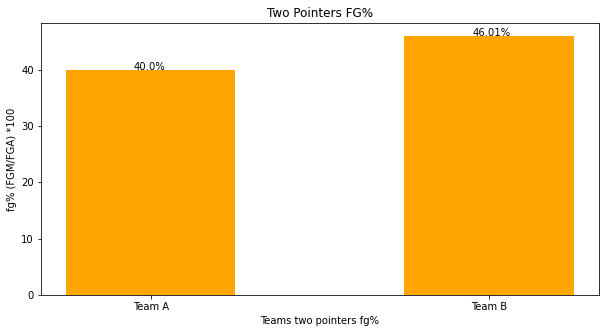

In [65]:
#plot teams fg% from two pointer (we expect this to be the same as eFG%)
generate_plots(team_a_2ptrs_fgper,team_b_2ptrs_fgper,"Teams two pointers fg%","fg% (FGM/FGA) *100","Two Pointers FG%","orange")

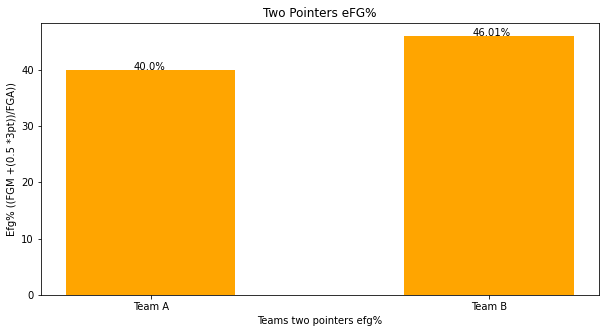

In [66]:
#plot teams eFG% for two pointers
generate_plots(team_a_2ptrs_efper,team_b_2ptrs_efper,"Teams two pointers efg%","Efg% ((FGM +(0.5 *3pt))/FGA))","Two Pointers eFG%","orange")

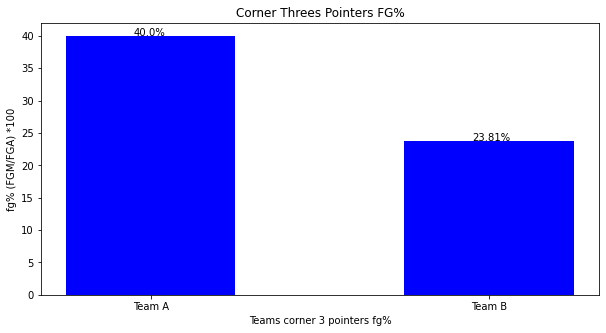

In [67]:
#plot teams FG% for corner threes pointers
generate_plots(team_a_corner_3s_fgper,team_b_corner_3s_fgper,"Teams corner 3 pointers fg%","fg% (FGM/FGA) *100","Corner Threes Pointers FG%","blue")

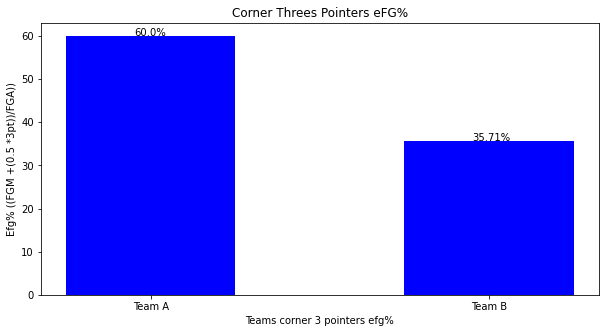

In [68]:
#plot teams eFG% for corner threes pointers
generate_plots(team_a_corner_3s_efper,team_b_corner_3s_efper,"Teams corner 3 pointers efg%","Efg% ((FGM +(0.5 *3pt))/FGA))","Corner Threes Pointers eFG%","blue")

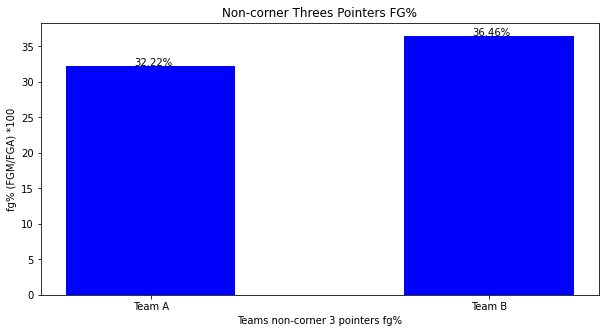

In [69]:
#plot teams FG% for noncorner threes pointers
generate_plots(team_a_noncorner_3s_fgper,team_b_noncorner_3s_fgper,"Teams non-corner 3 pointers fg%","fg% (FGM/FGA) *100","Non-corner Threes Pointers FG%","blue")

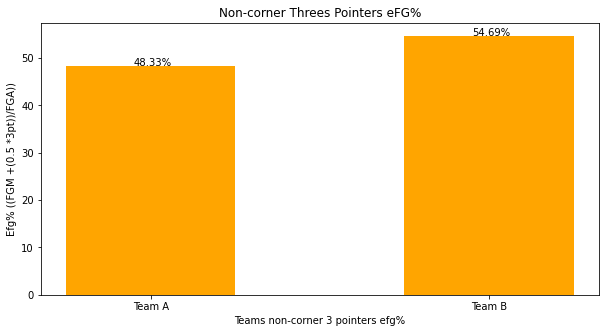

In [70]:
#plot teams eFG% for noncorner threes pointers
generate_plots(team_a_noncorner_3s_efper,team_b_noncorner_3s_efper,"Teams non-corner 3 pointers efg%","Efg% ((FGM +(0.5 *3pt))/FGA))","Non-corner Threes Pointers eFG%","orange")

In [71]:
print(team_a_2ptrs.shape[0]+team_a_corner_3s.shape[0]+team_a_noncorner_3s.shape[0],team_a_fgs.shape[0])
print(team_b_2ptrs.shape[0]+team_b_corner_3s.shape[0]+team_b_noncorner_3s.shape[0],team_b_fgs.shape[0])

280 280
280 280


In [72]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(team_a_2ptrs)

       team     x     y  fgmade   x_sqd   y_sqd       dist
2    Team A   0.5   1.0       1    0.25    1.00   1.118034
3    Team A  -5.6   5.2       0   31.36   27.04   7.641989
4    Team A   4.0  14.5       1   16.00  210.25  15.041609
5    Team A -13.6   4.0       1  184.96   16.00  14.176036
6    Team A  -9.0   7.2       1   81.00   51.84  11.525624
7    Team A  -1.2   1.5       1    1.44    2.25   1.920937
8    Team A  -9.2  15.3       0   84.64  234.09  17.853011
10   Team A   0.8   1.8       1    0.64    3.24   1.969772
12   Team A -13.9   2.1       0  193.21    4.41  14.057738
13   Team A  -0.7   1.6       1    0.49    2.56   1.746425
14   Team A  11.2  10.3       0  125.44  106.09  15.216110
15   Team A   0.6   0.9       1    0.36    0.81   1.081665
16   Team A -13.6  10.1       1  184.96  102.01  16.940189
19   Team A  21.7   0.6       0  470.89    0.36  21.708293
20   Team A  19.2   5.3       0  368.64   28.09  19.918082
23   Team A  11.3  -0.5       0  127.69    0.25  11.3110